Think about using interactive tables: <br>
<ul>
    <li> <a href="https://pypi.org/project/itables/">iTables</a> </li>
    <li> <a href="https://towardsdatascience.com/two-essential-pandas-add-ons-499c1c9b65de">Pivot Tables</a> </li>
</ul>

More useful links <br>
<ul>
    <li> <a href="https://medium.com/data-science-bootcamp/anaconda-miniconda-cheatsheet-for-data-scientists-2c1be12f56db">Conda Cheat Sheet</a> </li>
</ul>

In [1]:
# imports
import jupyterthemes as jt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.fft import fft, ifft
jt.jtplot.style()

%matplotlib inline

In [3]:
# moving working directory
import os
print(os.getcwd())  # Prints the current working directory
os.chdir('C:/Users/WillsPc/OneDrive/Documents/GitHub/AdvancedLab-PHSX444/lab02')

C:\Users\WillsPc\OneDrive\Documents\GitHub\AdvancedLab-PHSX444\lab02


Code stolen from:
https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html

There are examples on there, including one that shows how to use pandas to import this info.

In [6]:
def move_dir(newDir):
    # move working director 
    print(os.getcwd())  # Prints the current working directory
    os.chdir('../../' + newDir)  # Provide the new path here
    print(os.getcwd())  # Prints the current working directory
    print("current directory: \n" + " "*3 + str(os.listdir(path='.')))

In [7]:
#Plotting function to plot Spectrum analyzer data
def plotter(file, name):
    df = pd.read_csv(file, header=None)
    plt.figure(figsize=(14, 6))
    plt.plot(df[0], df[1]-np.min(df[1]))
    # plt.yscale("log")
    plt.title(name)
    plt.savefig("../../../images/" + name)
    plt.show()

In [8]:
# function to translate oscilloscope data to ffts
def my_fft(file, window="uniform", beta=14, scale="linear"):
    # x is my provided data
    x = pd.read_csv(file, header=None)
    sr = 1e6
    # sr is the sampling rate
    data = x[4]
    if window == "uniform":
        data = data
    elif window == "hanning":
        data *= np.hanning(x[3].size)
    elif window == "kaiser":
        data *= np.kaiser(x[3].size, beta)
    elif window == "hamming":
        data *= np.hamming(x[3].size)
    elif window == "bartlett":
        data *= np.bartlett(x[3].size)
    elif window == "blackman":
        data *= np.blackman(x[3].size)
    X = fft(data)
    N = len(X)
    n = np.arange(N)
    T = N/sr
    freq = n/T 

    plt.figure(figsize = (20, 6))
    plt.subplot(121)

    plt.stem(freq, np.abs(X), 'b', \
            markerfmt=" ", basefmt="-b")
    plt.yscale(scale)
    # plt.ylim(np.sqrt(np.max(np.abs(X))), 1.10*np.max(np.abs(X)))
    # plt.xlim(9e5,11e5)
    plt.xlabel('Freq (Hz)')
    plt.ylabel('FFT Amplitude |X(freq)|')
    # plt.xlim(0, 10)

    plt.subplot(122)
    plt.plot(x[3], ifft(X), 'r')
    # plt.xlim(x[3][0],np.median(x[3]))
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(window)
    plt.tight_layout()
    file = file.replace(".", "_")
    print(file)
    plt.savefig("../../../images/" + file[:-4] + "_" + window)
    plt.show()

In [9]:
ls ..

 Volume in drive C is OS
 Volume Serial Number is 4E89-5B0C

 Directory of C:\Users\WillsPc\OneDrive\Documents\GitHub\AdvancedLab-PHSX444

10/08/2021  04:24 PM    <DIR>          .
10/08/2021  04:24 PM    <DIR>          ..
10/04/2021  07:43 PM    <DIR>          lab01
10/09/2021  03:31 PM    <DIR>          lab02
10/08/2021  04:24 PM               128 README.md
10/06/2021  10:45 PM    <DIR>          reports
               1 File(s)            128 bytes
               5 Dir(s)  393,929,416,704 bytes free


In [10]:
os.chdir('data/part_1/part_a_spectrum_analyzer')  # Provide the new path here

# Part 1

## a: 
Introduction to spectrum analyzers. View signals on an oscilloscope and spectrum analyzer;
record both. Use a FFT to transform the oscilloscope data to the spectral data using numpy
or matlab (as well as you can). Explain the effect of the frequency resolution (measurement
time), windows, and linear versus log scale. Give a mathematical description of the origin of
the frequency domain signatures you observe for each signal.

In [11]:
move_dir("part_1/part_a_spectrum_analyzer")

C:\Users\WillsPc\OneDrive\Documents\GitHub\AdvancedLab-PHSX444\lab02\data\part_1\part_a_spectrum_analyzer
C:\Users\WillsPc\OneDrive\Documents\GitHub\AdvancedLab-PHSX444\lab02\data\part_1\part_a_spectrum_analyzer
current directory: 
   ['hanning_sin_1_1.03khz.csv', 'hanning_sin_1_1khz.csv', 'hanning_squr_1_1.03khz.csv', 'hanning_squr_1_1khz.csv', 'hanning_tri_1_1.03khz.csv', 'hanning_tri_1_1khz.csv', 'uniform_sin_1_1.03khz.csv', 'uniform_sin_1_1khz.csv', 'uniform_squr_1_1.03khz.csv', 'uniform_squr_1_1khz.csv', 'uniform_tri_1_1.03khz.csv', 'uniform_tri_1_1khz.csv']


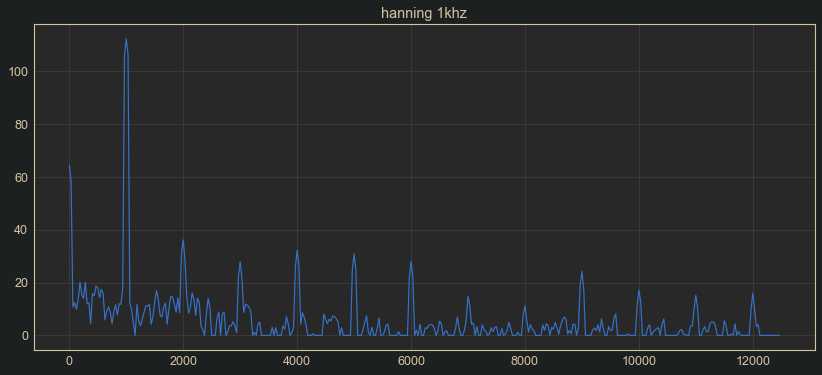

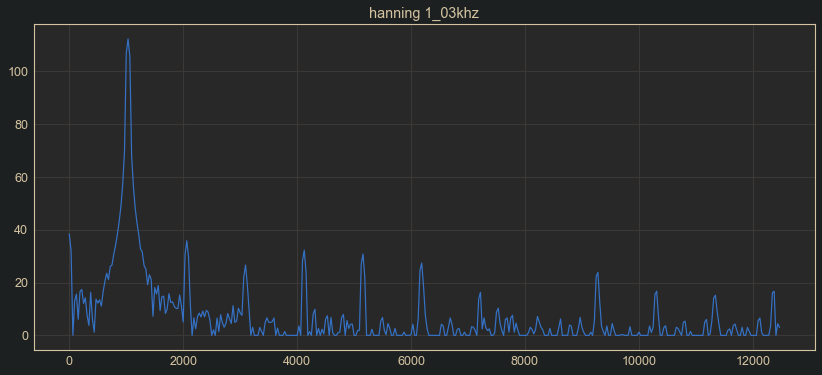

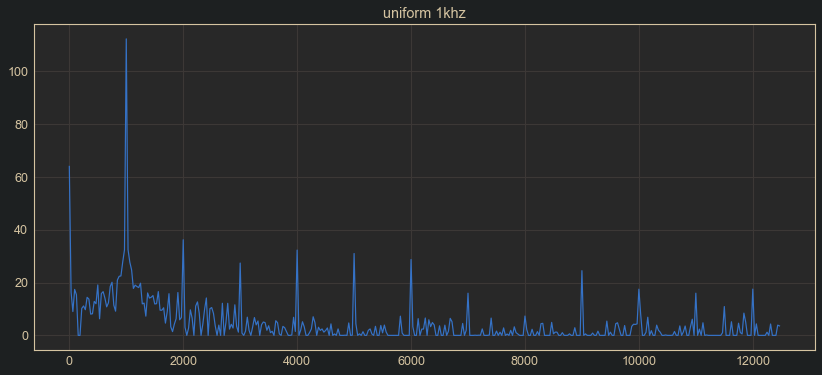

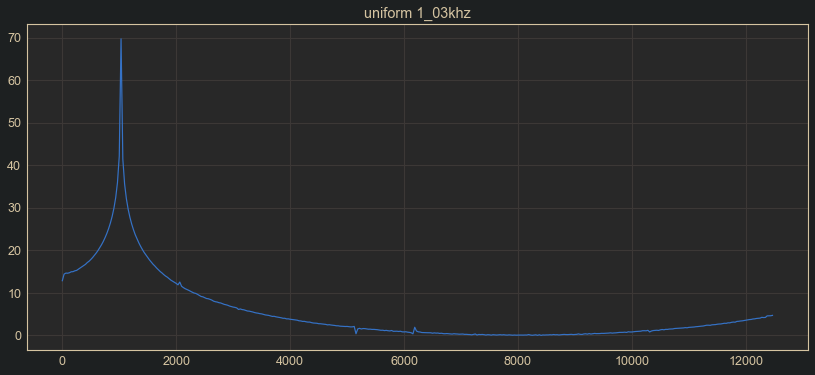

In [12]:
# Spectrum analyzer sin
plotter("hanning_sin_1_1khz.csv","hanning 1khz")
plotter("hanning_sin_1_1.03khz.csv", "hanning 1_03khz")
plotter("uniform_sin_1_1khz.csv", "uniform 1khz")
plotter("uniform_sin_1_1.03khz.csv", "uniform 1_03khz")

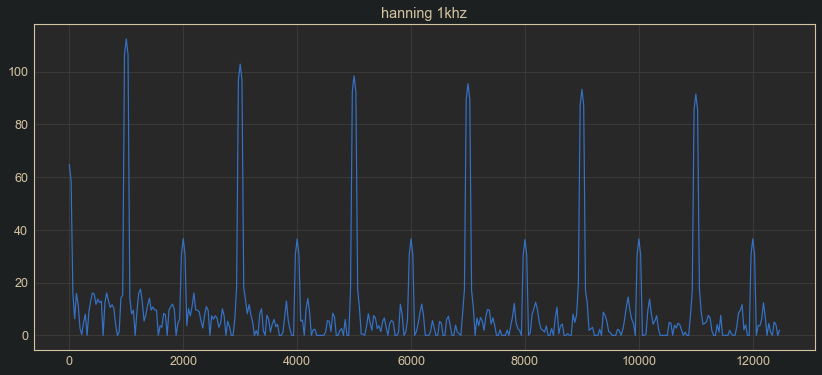

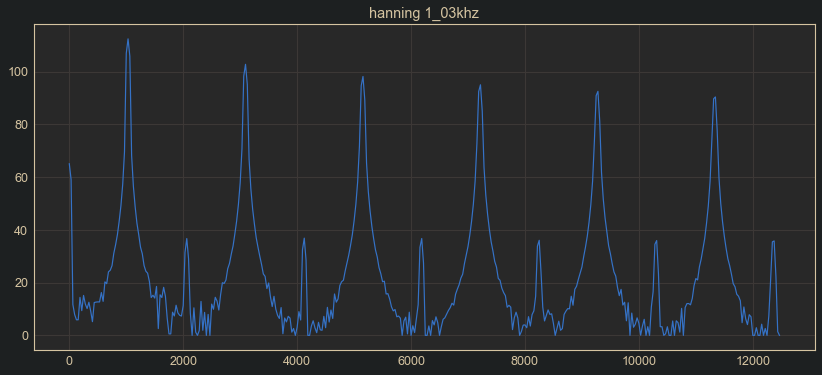

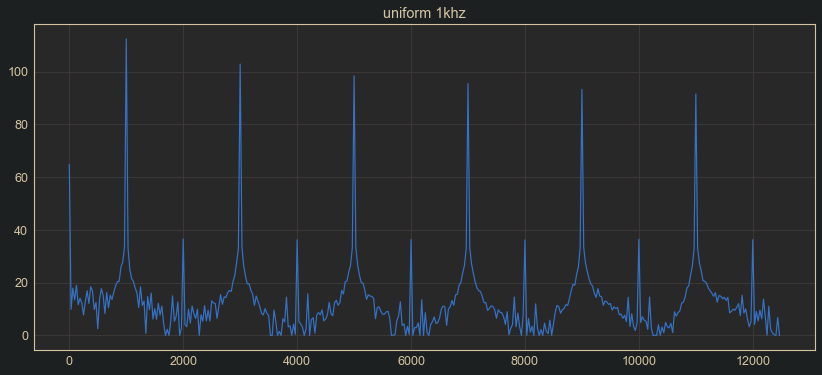

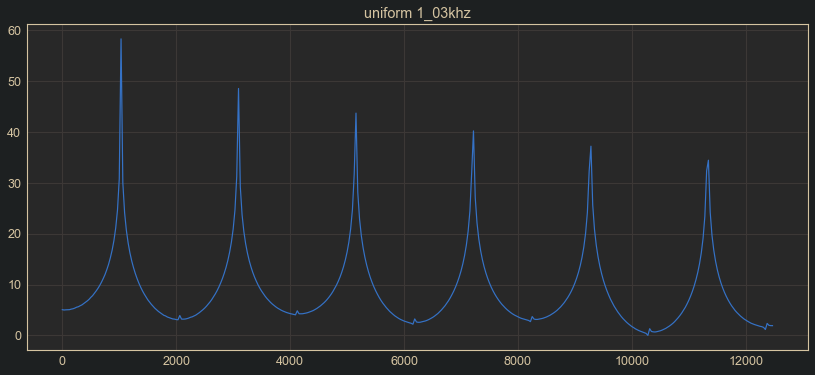

In [13]:
# Specturm Analyzer square wave
plotter("hanning_squr_1_1khz.csv","hanning 1khz")
plotter("hanning_squr_1_1.03khz.csv", "hanning 1_03khz")
plotter("uniform_squr_1_1khz.csv", "uniform 1khz")
plotter("uniform_squr_1_1.03khz.csv", "uniform 1_03khz")

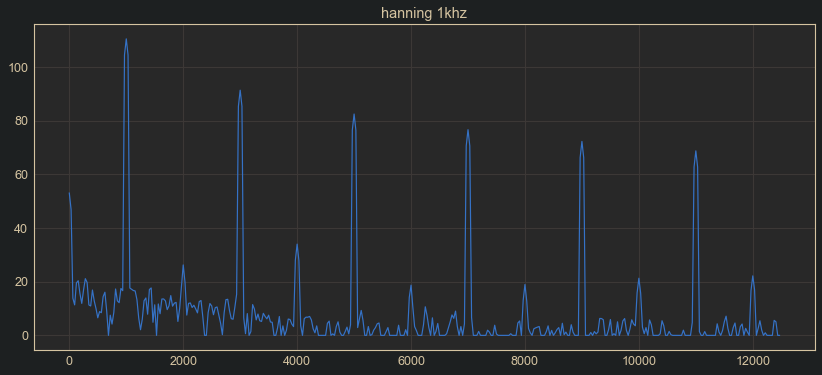

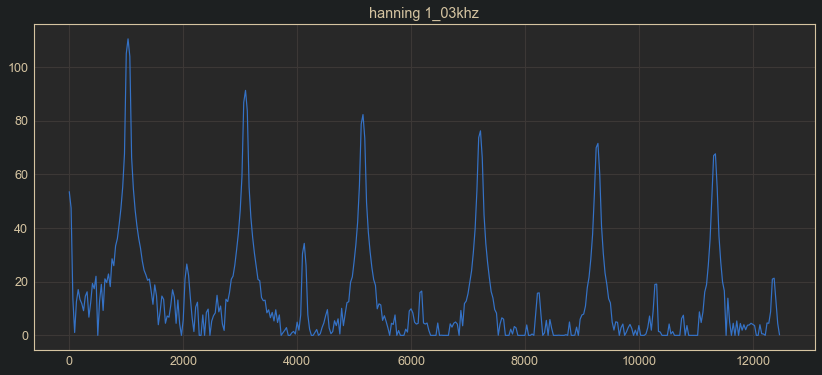

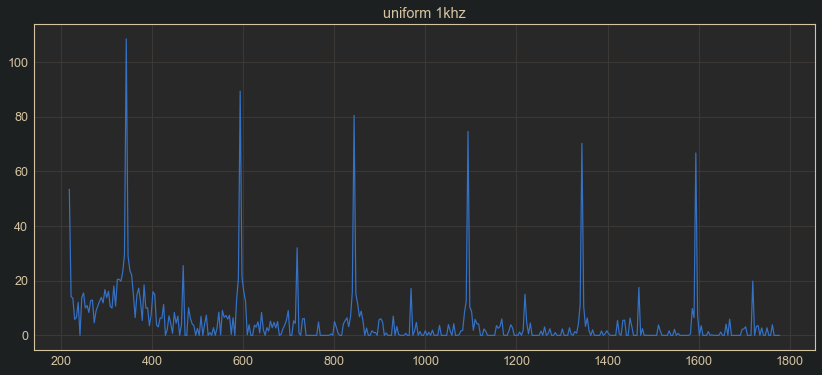

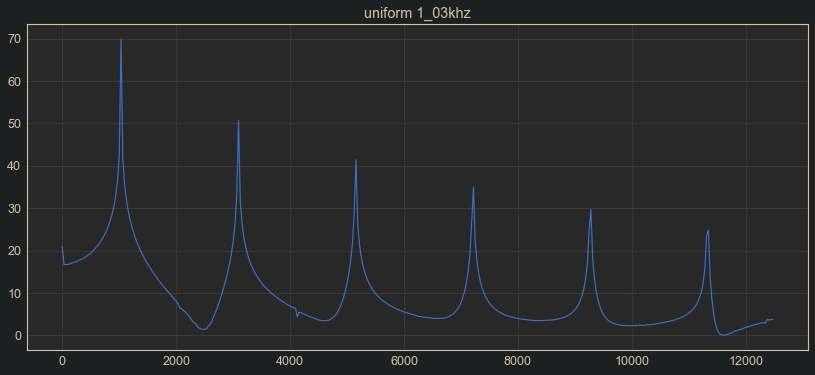

In [14]:
# Specturm Analyzer see-saw
plotter("hanning_tri_1_1khz.csv","hanning 1khz")
plotter("hanning_tri_1_1.03khz.csv", "hanning 1_03khz")
plotter("uniform_tri_1_1khz.csv", "uniform 1khz")
plotter("uniform_tri_1_1.03khz.csv", "uniform 1_03khz")

In [15]:
ls C:\Users\WillsPc\OneDrive\Documents\GitHub\AdvancedLab-PHSX444\lab02\data\part_1\part_a_oscilloscope

 Volume in drive C is OS
 Volume Serial Number is 4E89-5B0C

 Directory of C:\Users\WillsPc\OneDrive\Documents\GitHub\AdvancedLab-PHSX444\lab02\data\part_1\part_a_oscilloscope

10/05/2021  10:33 PM    <DIR>          .
10/05/2021  10:33 PM    <DIR>          ..
09/25/2021  12:29 AM         1,152,054 sin_1_1.03khz.BMP
09/25/2021  12:29 AM            79,089 sin_1_1.03khz.CSV
09/25/2021  12:28 AM         1,152,054 sin_1_1khz.BMP
09/25/2021  12:28 AM            79,089 sin_1_1khz.CSV
09/25/2021  12:29 AM         1,152,054 squr_1_1.03khz.BMP
09/25/2021  12:29 AM            79,089 squr_1_1.03khz.CSV
09/25/2021  12:29 AM         1,152,054 squr_1_1khz.BMP
09/25/2021  12:29 AM            79,089 squr_1_1khz.CSV
09/25/2021  12:29 AM         1,152,054 tri_1_1.03khz.BMP
09/25/2021  12:29 AM            79,089 tri_1_1.03khz.CSV
09/25/2021  12:29 AM         1,152,054 tri_1_1khz.BMP
09/25/2021  12:29 AM            79,089 tri_1_1khz.CSV
              12 File(s)      7,386,858 bytes
               2 Dir(s) 

In [16]:
move_dir("\part_1\part_a_oscilloscope")

C:\Users\WillsPc\OneDrive\Documents\GitHub\AdvancedLab-PHSX444\lab02\data\part_1\part_a_spectrum_analyzer
C:\Users\WillsPc\OneDrive\Documents\GitHub\AdvancedLab-PHSX444\lab02\data\part_1\part_a_oscilloscope
current directory: 
   ['sin_1_1.03khz.BMP', 'sin_1_1.03khz.CSV', 'sin_1_1khz.BMP', 'sin_1_1khz.CSV', 'squr_1_1.03khz.BMP', 'squr_1_1.03khz.CSV', 'squr_1_1khz.BMP', 'squr_1_1khz.CSV', 'tri_1_1.03khz.BMP', 'tri_1_1.03khz.CSV', 'tri_1_1khz.BMP', 'tri_1_1khz.CSV']


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


sin_1_1khz_CSV


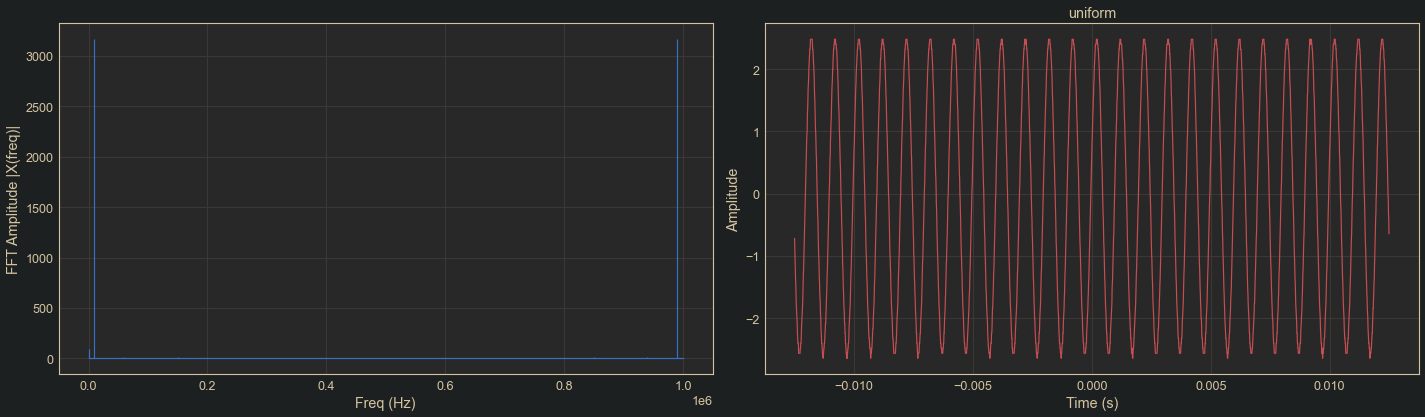

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


sin_1_1_03khz_CSV


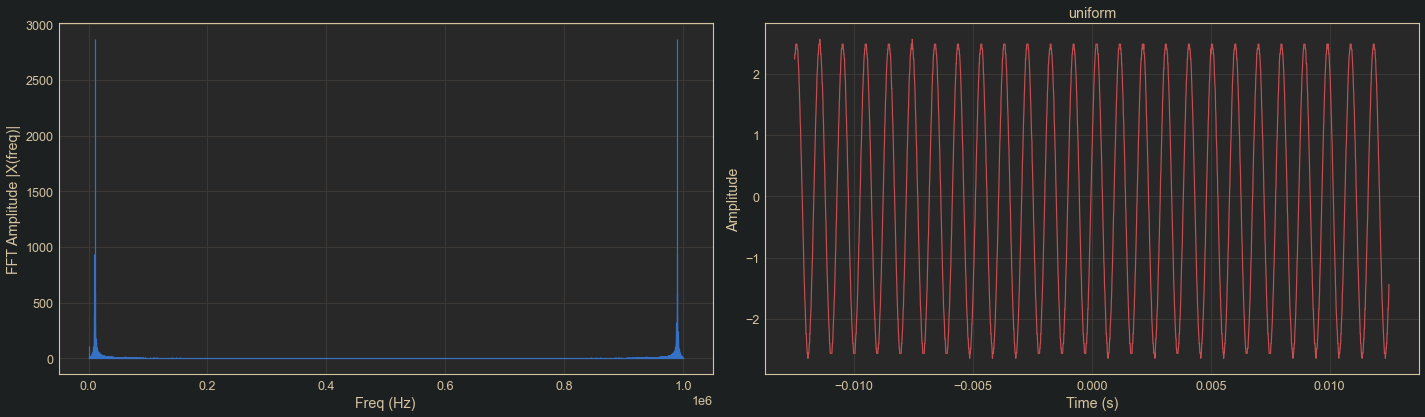

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


squr_1_1khz_CSV


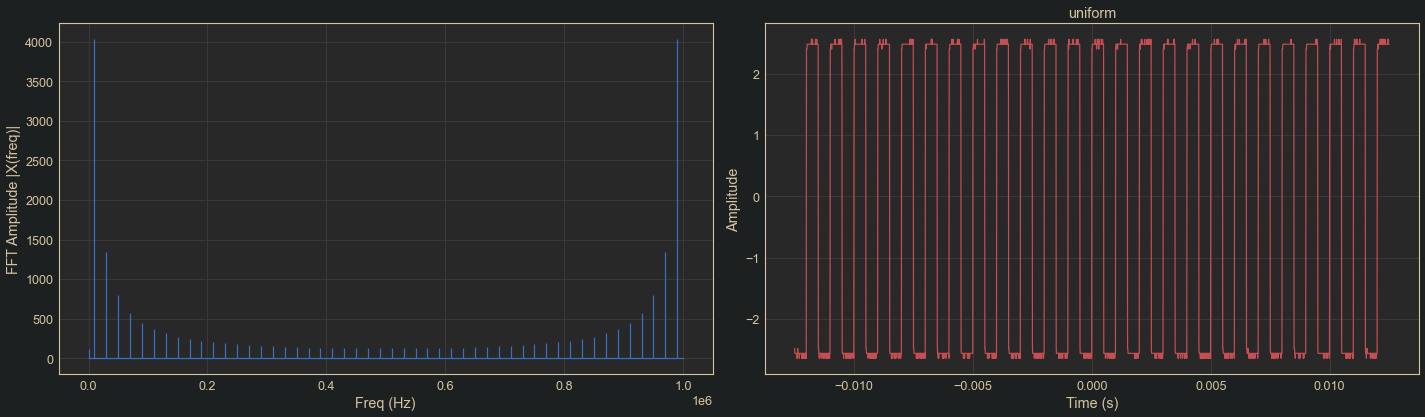

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


squr_1_1_03khz_CSV


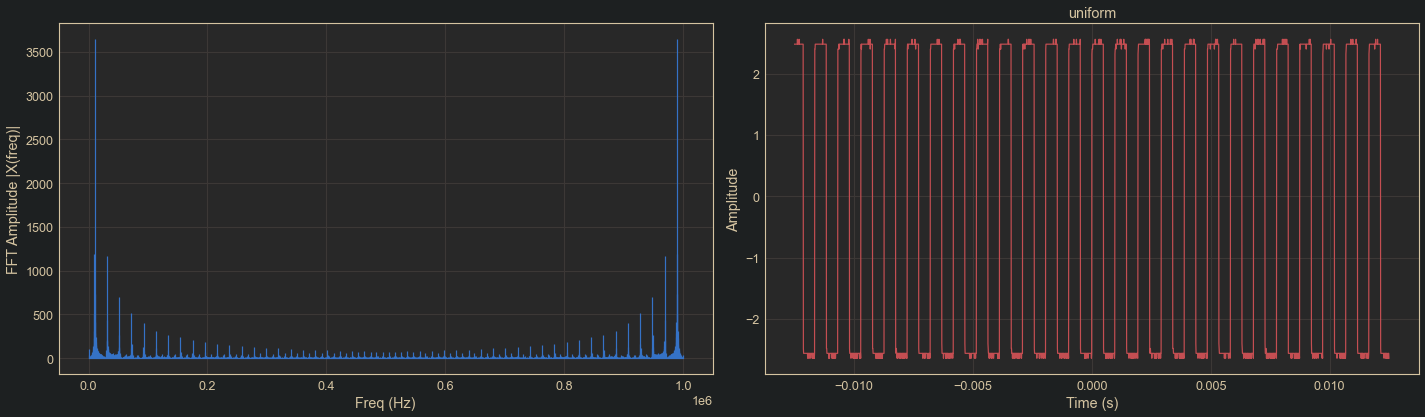

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


tri_1_1khz_CSV


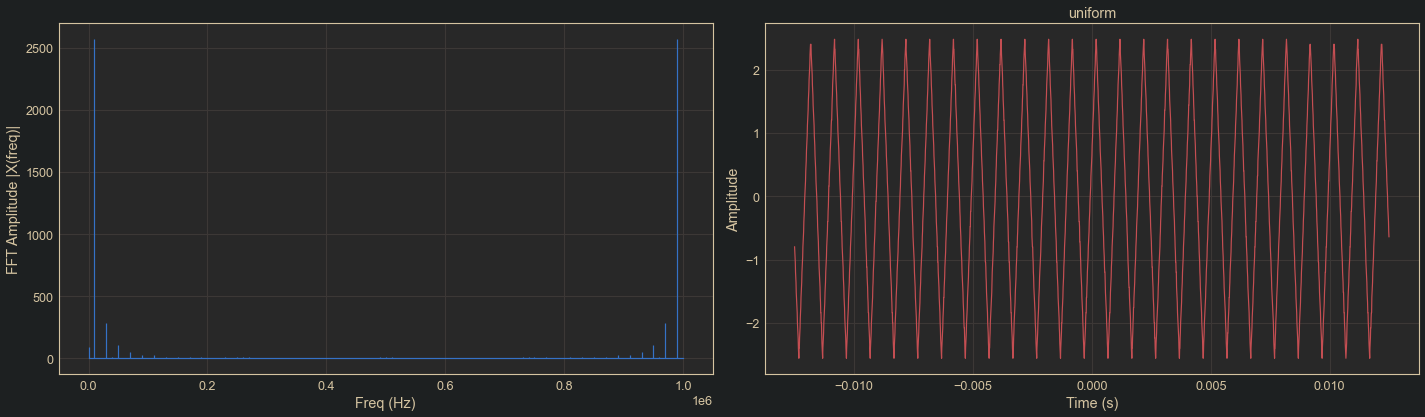

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


tri_1_1_03khz_CSV


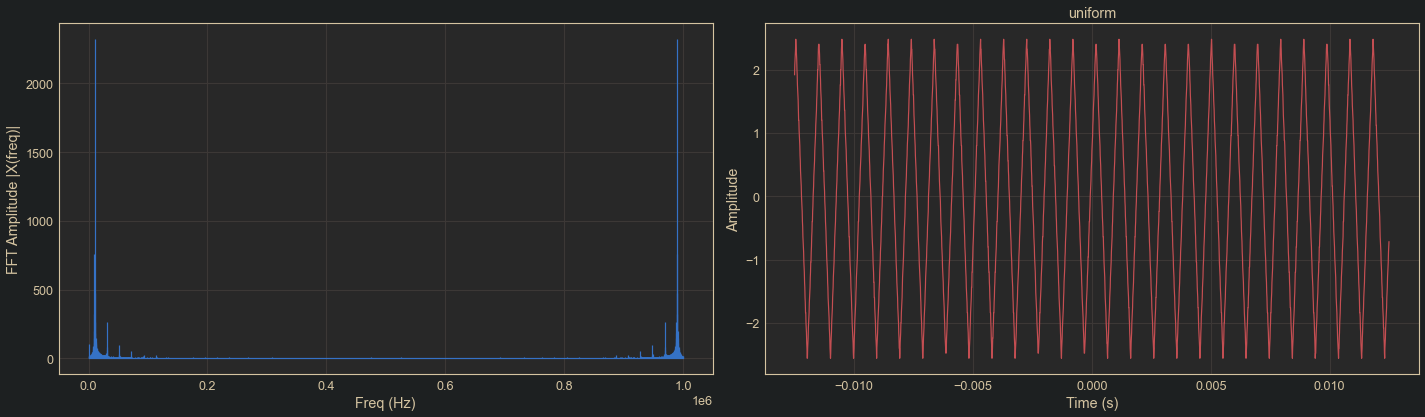

In [17]:
my_fft("sin_1_1khz.CSV")
my_fft('sin_1_1.03khz.CSV')
my_fft('squr_1_1khz.CSV')
my_fft('squr_1_1.03khz.CSV')
my_fft('tri_1_1khz.CSV')
my_fft('tri_1_1.03khz.CSV')

## b:

In [18]:
ls C:\Users\WillsPc\OneDrive\Documents\GitHub\AdvancedLab-PHSX444\lab02\data\part_1

 Volume in drive C is OS
 Volume Serial Number is 4E89-5B0C

 Directory of C:\Users\WillsPc\OneDrive\Documents\GitHub\AdvancedLab-PHSX444\lab02\data\part_1

10/08/2021  10:54 AM    <DIR>          .
10/08/2021  10:54 AM    <DIR>          ..
10/08/2021  10:55 AM    <DIR>          buried_treasuer
10/06/2021  03:05 PM    <DIR>          osci_mult
10/05/2021  10:33 PM    <DIR>          part_a_oscilloscope
10/05/2021  10:34 PM    <DIR>          part_a_spectrum_analyzer
10/05/2021  10:35 PM    <DIR>          part_b_oscilloscope
10/05/2021  10:35 PM    <DIR>          part_b_spectrum_analyzer
               0 File(s)              0 bytes
               8 Dir(s)  393,928,015,872 bytes free


In [19]:
move_dir("part_1\part_b_spectrum_analyzer")

C:\Users\WillsPc\OneDrive\Documents\GitHub\AdvancedLab-PHSX444\lab02\data\part_1\part_a_oscilloscope
C:\Users\WillsPc\OneDrive\Documents\GitHub\AdvancedLab-PHSX444\lab02\data\part_1\part_b_spectrum_analyzer
current directory: 
   ['BMH_summer_96_100.csv', 'BMH_summer_99_100.csv', 'hanning_summer_1and1.03.csv', 'hanning_summer_96_100.csv', 'hanning_summer_99_100.csv', 'hanning_summer_toosmall.csv']


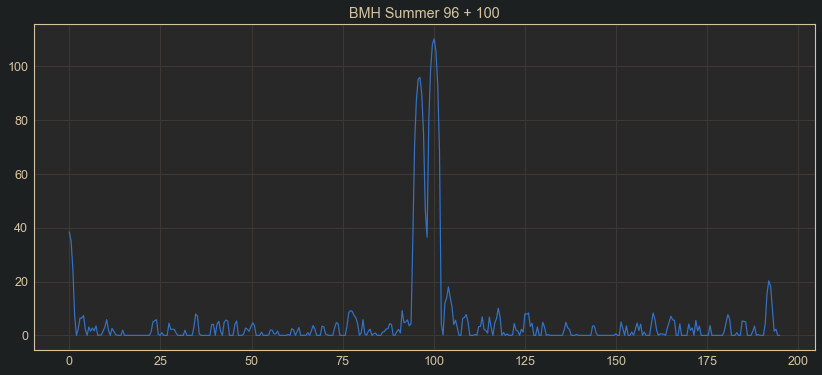

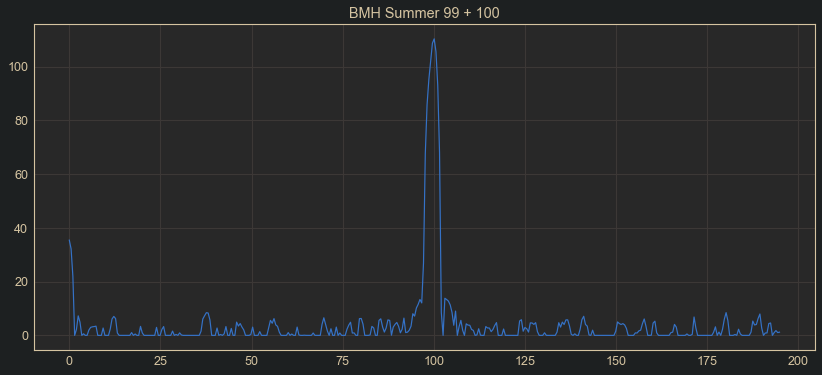

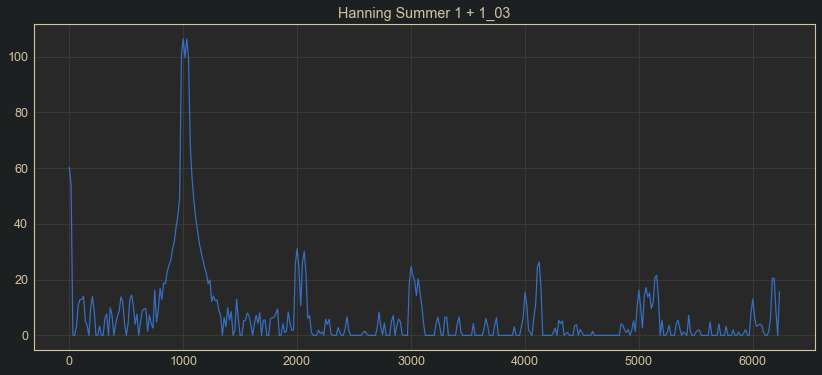

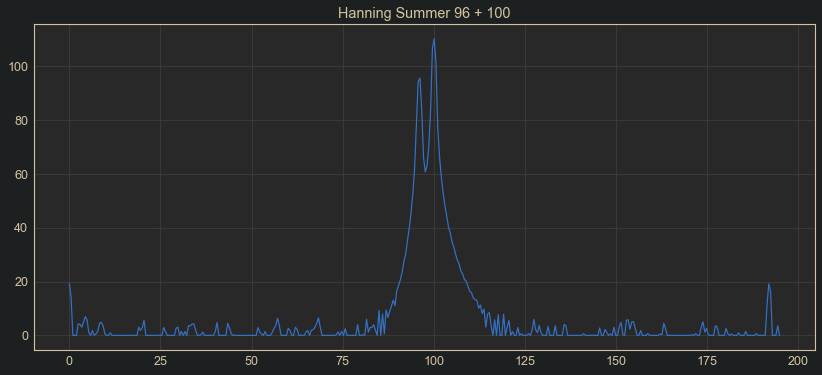

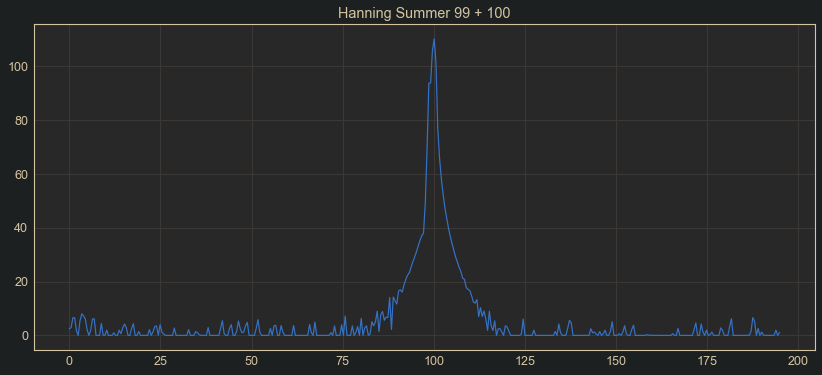

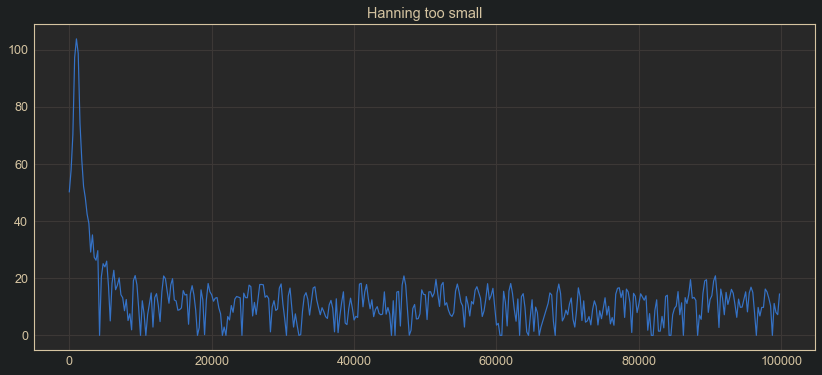

In [20]:
plotter("BMH_summer_96_100.csv", "BMH Summer 96 + 100")
plotter("BMH_summer_99_100.csv", "BMH Summer 99 + 100")
plotter("hanning_summer_1and1.03.csv", "Hanning Summer 1 + 1_03")
plotter("hanning_summer_96_100.csv", "Hanning Summer 96 + 100")
plotter("hanning_summer_99_100.csv", "Hanning Summer 99 + 100")
plotter("hanning_summer_toosmall.csv", "Hanning too small")

In [21]:
move_dir("part_1\part_b_oscilloscope")

C:\Users\WillsPc\OneDrive\Documents\GitHub\AdvancedLab-PHSX444\lab02\data\part_1\part_b_spectrum_analyzer
C:\Users\WillsPc\OneDrive\Documents\GitHub\AdvancedLab-PHSX444\lab02\data\part_1\part_b_oscilloscope
current directory: 
   ['F0001CH1.CSV', 'F0001TEK.BMP', 'F0001TEK.SET', 'F0002CH1.CSV', 'F0002TEK.BMP', 'F0002TEK.SET']


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


F0001CH1_CSV


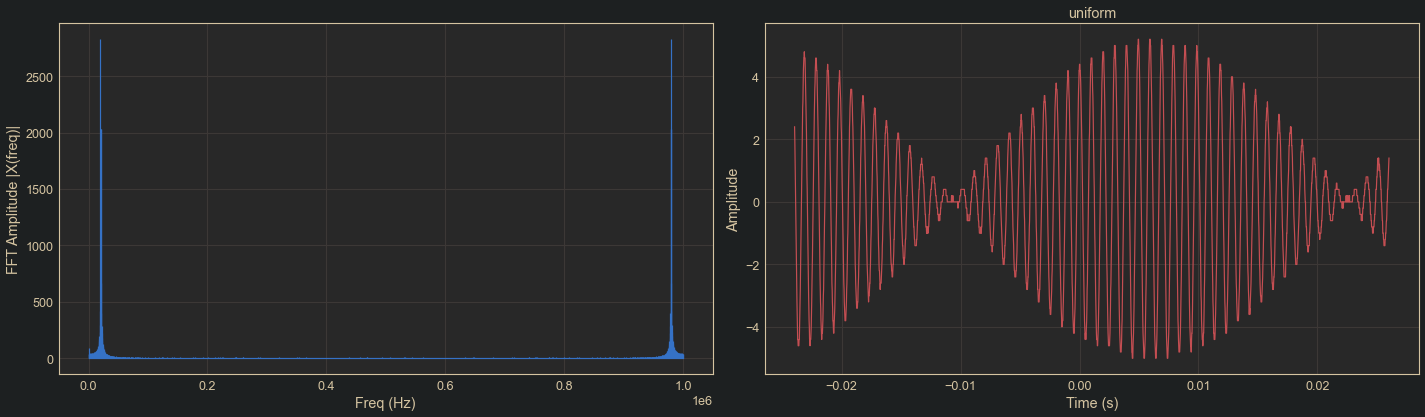

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


F0002CH1_CSV


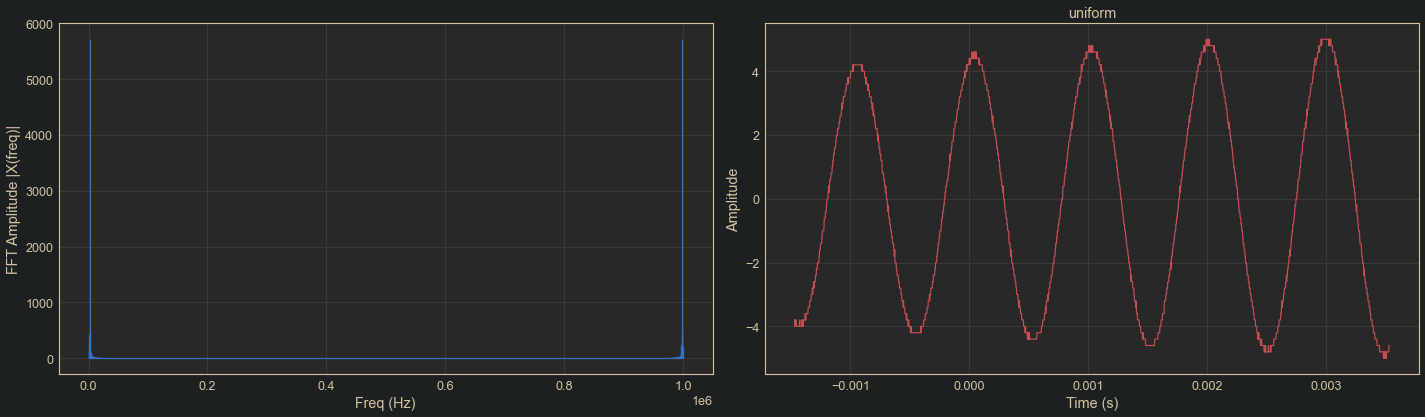

In [22]:
my_fft('F0001CH1.CSV')
my_fft('F0002CH1.CSV')

## c:

C:\Users\WillsPc\OneDrive\Documents\GitHub\AdvancedLab-PHSX444\lab02\data\part_3\part_d
C:\Users\WillsPc\OneDrive\Documents\GitHub\AdvancedLab-PHSX444\lab02\data\part_1\part_c_oscilloscope
current directory: 
   ['F0000CH1.CSV', 'F0000CH1_1.CSV', 'F0000TEK.BMP', 'F0000TEK.SET', 'F0000TEK_1.BMP', 'F0000TEK_1.SET']
F0000CH1_CSV


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


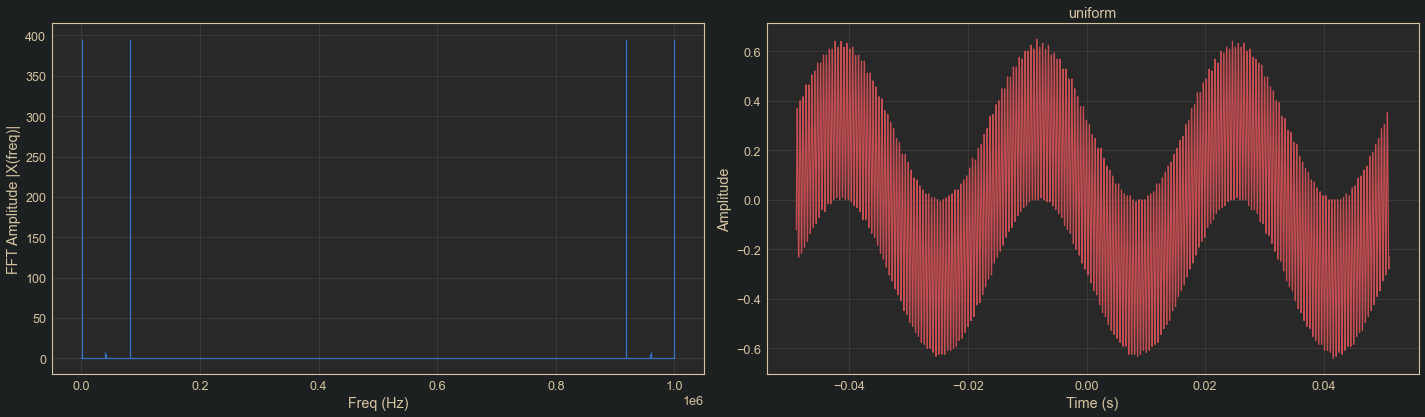

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


F0000CH1_1_CSV


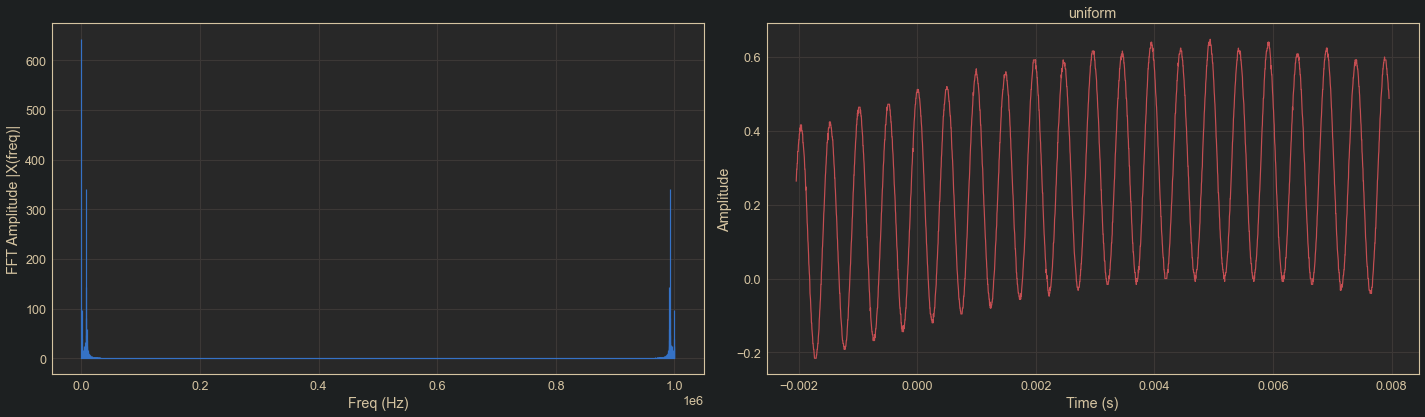

In [35]:
move_dir('part_1\part_c_oscilloscope')
my_fft("F0000CH1.CSV")
my_fft("F0000CH1_1.CSV")

C:\Users\WillsPc\OneDrive\Documents\GitHub\AdvancedLab-PHSX444\lab02\data\part_1\part_c_spectrum_analyzer
C:\Users\WillsPc\OneDrive\Documents\GitHub\AdvancedLab-PHSX444\lab02\data\part_1\part_c_spectrum_analyzer
current directory: 
   ['hanning_sin_1_1.03khz.csv', 'uniform_sin_1_1.03khz.csv']


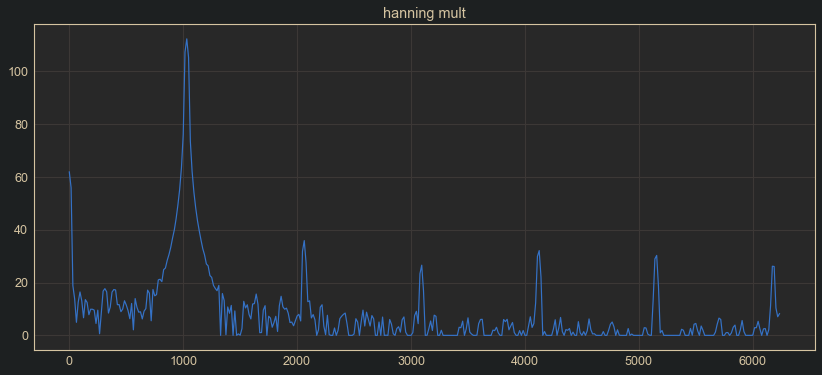

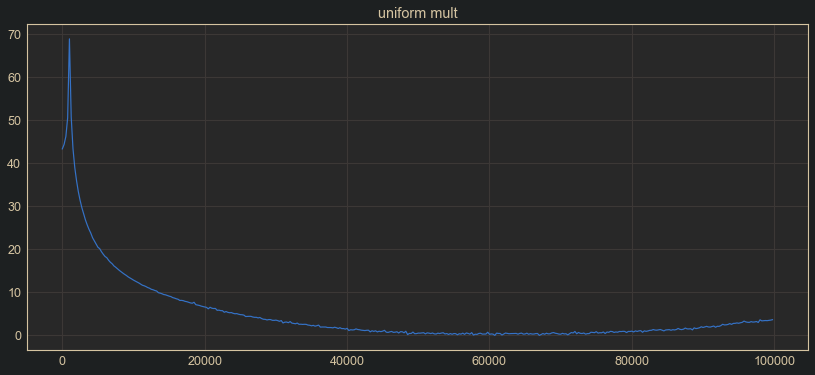

In [37]:
move_dir("part_1\part_c_spectrum_analyzer")
plotter("hanning_sin_1_1.03khz.csv", "hanning mult")
plotter("uniform_sin_1_1.03khz.csv", "uniform mult")

In [24]:
ls ..\..\part_1

 Volume in drive C is OS
 Volume Serial Number is 4E89-5B0C

 Directory of C:\Users\WillsPc\OneDrive\Documents\GitHub\AdvancedLab-PHSX444\lab02\data\part_1

10/08/2021  10:54 AM    <DIR>          .
10/08/2021  10:54 AM    <DIR>          ..
10/08/2021  10:55 AM    <DIR>          buried_treasuer
10/06/2021  03:05 PM    <DIR>          osci_mult
10/05/2021  10:33 PM    <DIR>          part_a_oscilloscope
10/05/2021  10:34 PM    <DIR>          part_a_spectrum_analyzer
10/05/2021  10:35 PM    <DIR>          part_b_oscilloscope
10/05/2021  10:35 PM    <DIR>          part_b_spectrum_analyzer
               0 File(s)              0 bytes
               8 Dir(s)  393,927,938,048 bytes free


## d:

In [45]:
move_dir("part_1/part_d_oscilloscope")

C:\Users\WillsPc\OneDrive\Documents\GitHub\AdvancedLab-PHSX444\lab02\data\part_1\part_d_specturm_analyzer
C:\Users\WillsPc\OneDrive\Documents\GitHub\AdvancedLab-PHSX444\lab02\data\part_1\part_d_oscilloscope
current directory: 
   ['setting_A.BMP', 'setting_A.CSV', 'setting_A.SET', 'setting_B.BMP', 'setting_B.CSV', 'setting_B.SET', 'setting_C.BMP', 'setting_C.CSV', 'setting_C.SET']


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


setting_A_csv


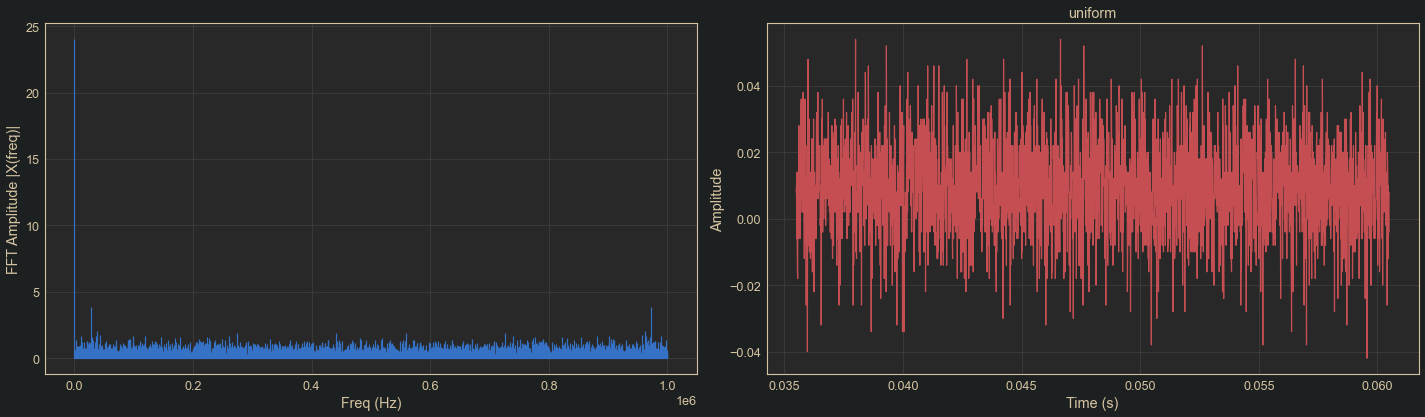

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


setting_B_csv


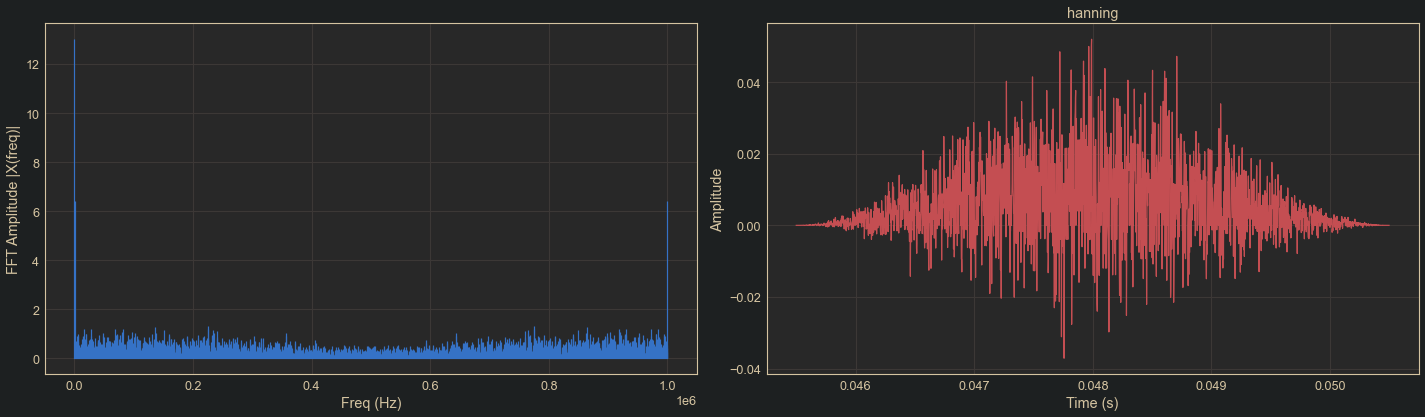

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


setting_C_csv


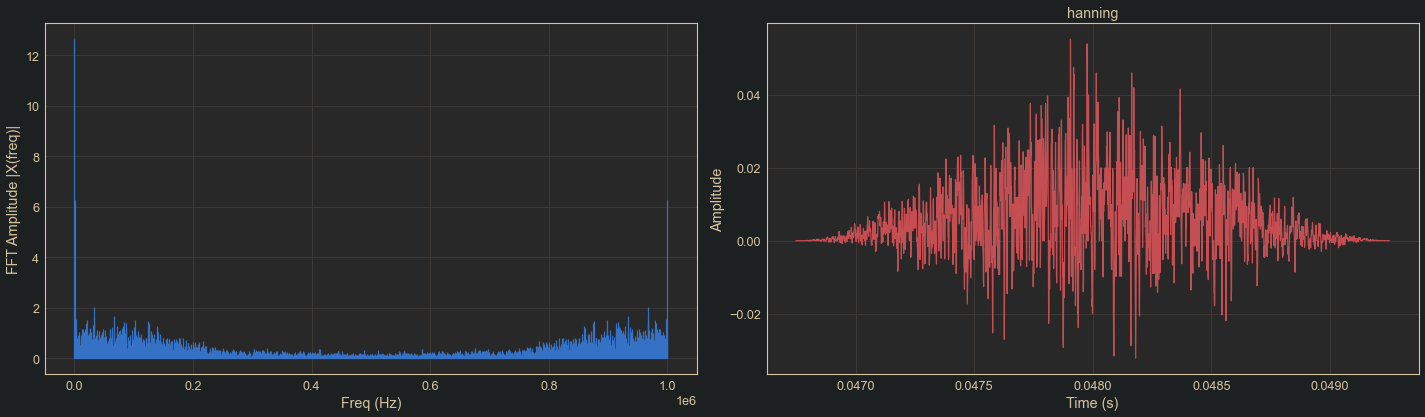

In [50]:
my_fft('setting_A.csv',window="uniform")
my_fft('setting_B.csv',window="hanning")
my_fft('setting_C.csv',window="hanning")

In [43]:
move_dir("part_1/part_d_specturm_analyzer")

C:\Users\WillsPc\OneDrive\Documents\GitHub\AdvancedLab-PHSX444\lab02\data\part_1\part_d_oscilloscope
C:\Users\WillsPc\OneDrive\Documents\GitHub\AdvancedLab-PHSX444\lab02\data\part_1\part_d_specturm_analyzer
current directory: 
   ['setting_A.csv', 'setting_B.csv', 'setting_C.csv']


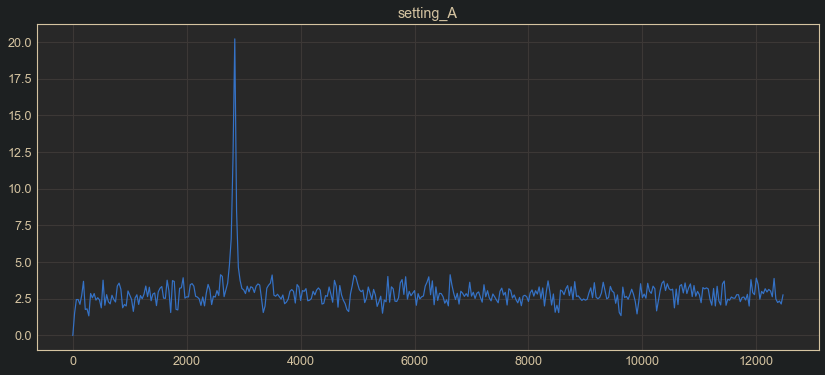

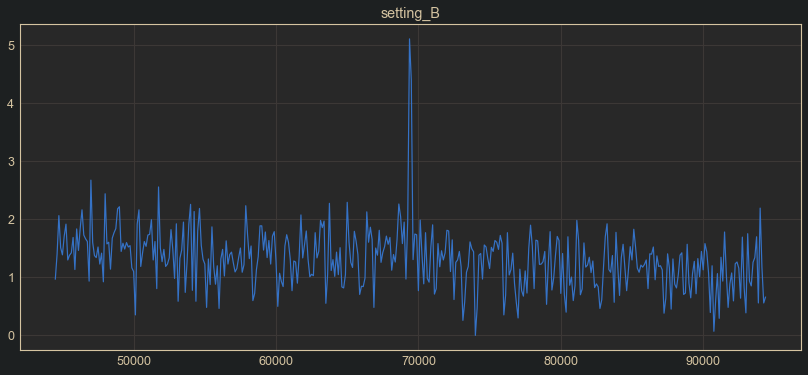

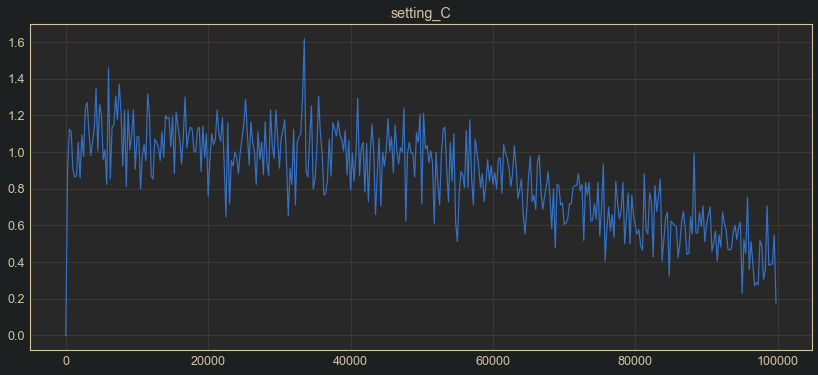

In [44]:
plotter("setting_A.csv","setting_A")
plotter("setting_B.csv","setting_B")
plotter("setting_C.csv","setting_C")

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


F0001CH1_CSV


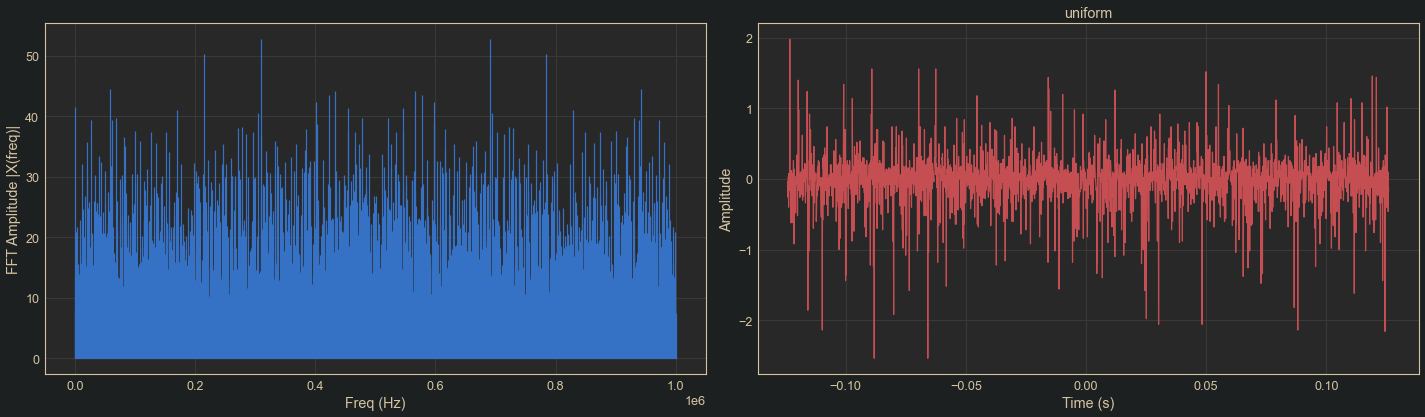

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


F0002CH1_CSV


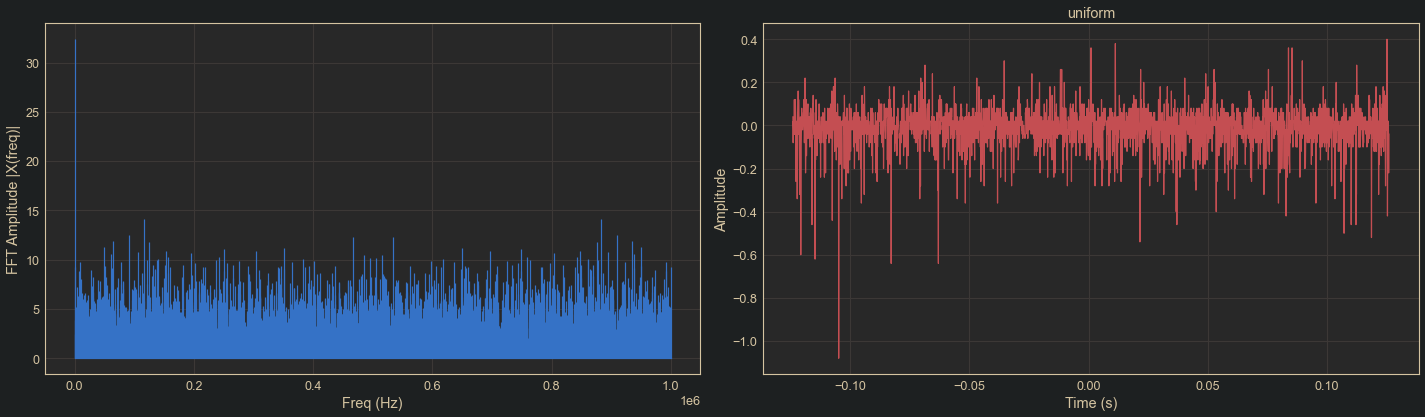

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


F0003CH1_CSV


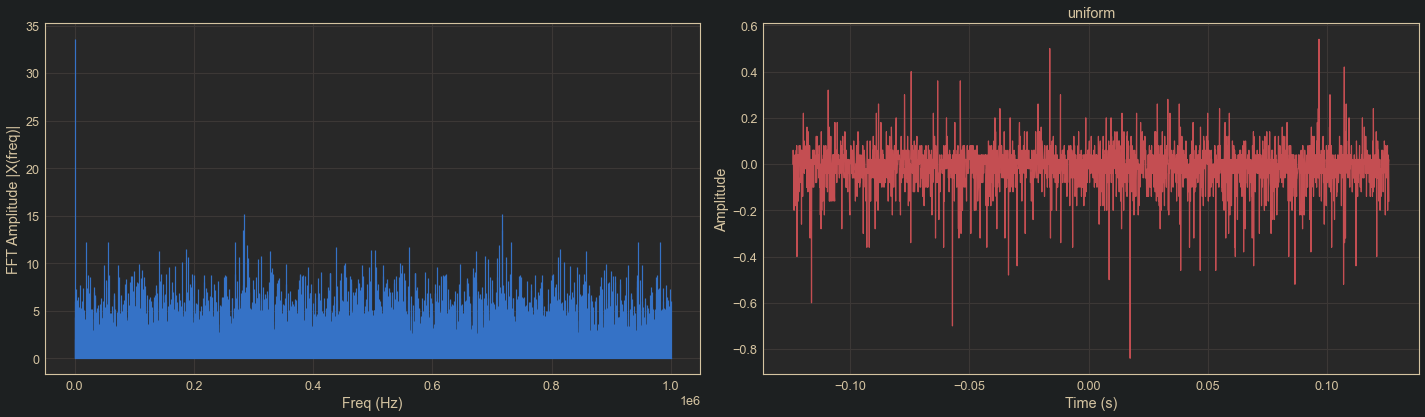

In [27]:
my_fft("F0001CH1.CSV")
my_fft("F0002CH1.CSV")
my_fft("F0003CH1.CSV")

# Part 2

C:\Users\WillsPc\OneDrive\Documents\GitHub\AdvancedLab-PHSX444\lab02\data\part_1\buried_treasuer
C:\Users\WillsPc\OneDrive\Documents\GitHub\AdvancedLab-PHSX444\lab02\data\part_2\part_c
current directory: 
   ['run_01', 'run_02', 'run_03']


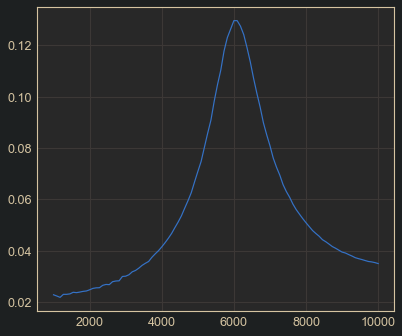

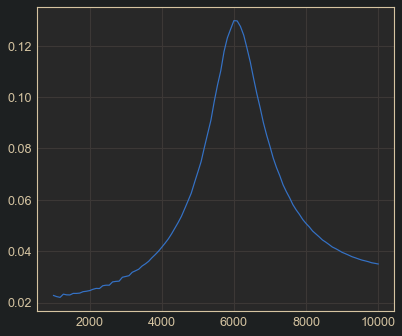

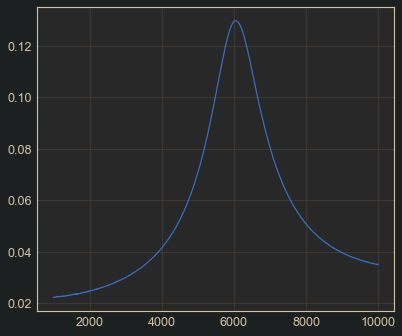

In [28]:
move_dir("part_2\part_c")
run01 = pd.read_csv("run_01", delimiter = " ")
run02 = pd.read_csv("run_02", delimiter = " ")
run03 = pd.read_csv("run_03", delimiter = " ")
plt.plot(run01["f"], run01["R"])
plt.show()
plt.plot(run02["f"], run02["R"])
plt.show()
plt.plot(run03["f"], run03["R"])
plt.show()

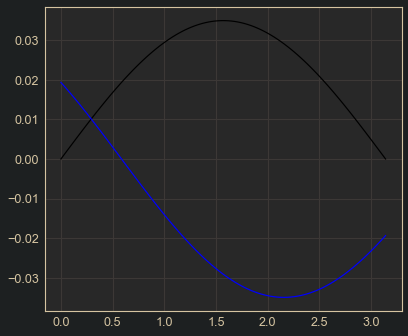

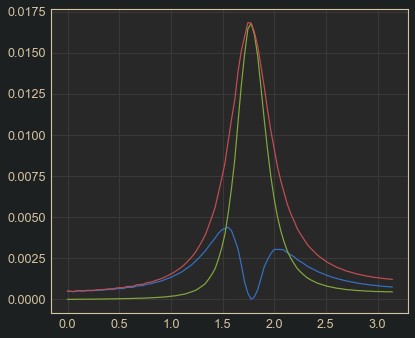

In [29]:
xlin = np.linspace(0, np.pi, 100)
plt.plot(xlin, np.sqrt((run02["Y"][99]*np.sin(xlin))**2 + (run02["X"][99]*np.sin(xlin))**2), color="black")
plt.plot(xlin, run02["R"][99]*np.sin(xlin + run02["theta"][99]), color="blue")
plt.show()
plt.plot(xlin,run02["X"]**2)
plt.plot(xlin,run02["Y"]**2)
plt.plot(xlin,run02["R"]**2)

C:\Users\WillsPc\OneDrive\Documents\GitHub\AdvancedLab-PHSX444\lab02\data\part_2\part_c
C:\Users\WillsPc\OneDrive\Documents\GitHub\AdvancedLab-PHSX444\lab02\data\part_2\part_d
current directory: 
   ['F0000CH1.CSV', 'F0000TEK.BMP', 'F0000TEK.SET', 'F0001CH1.CSV', 'F0001TEK.BMP', 'F0001TEK.SET', 'F0002CH1.CSV', 'F0002TEK.BMP', 'F0002TEK.SET', 'F0003CH1.CSV', 'F0003TEK.BMP', 'F0003TEK.SET']


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


F0000CH1_CSV


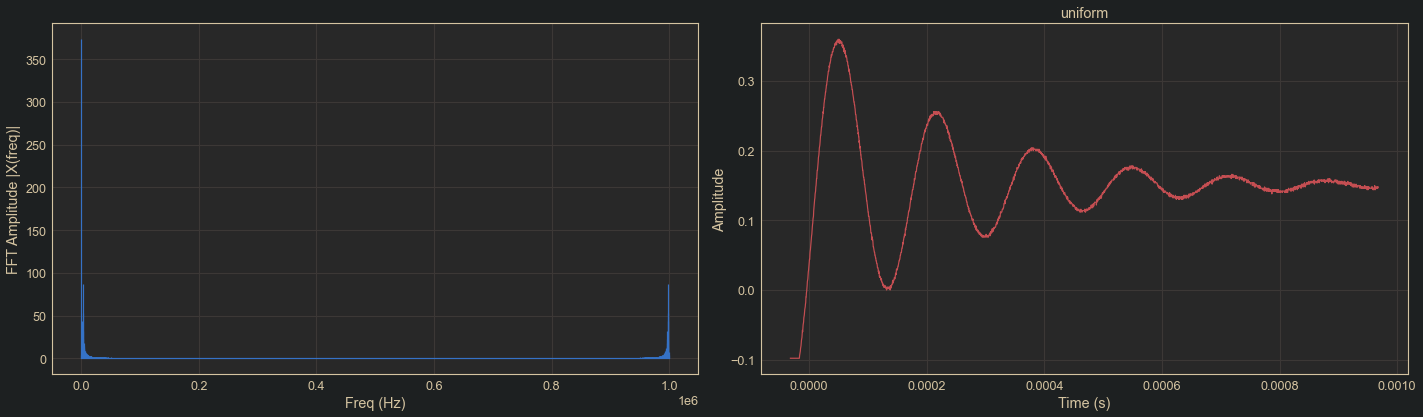

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


F0001CH1_CSV


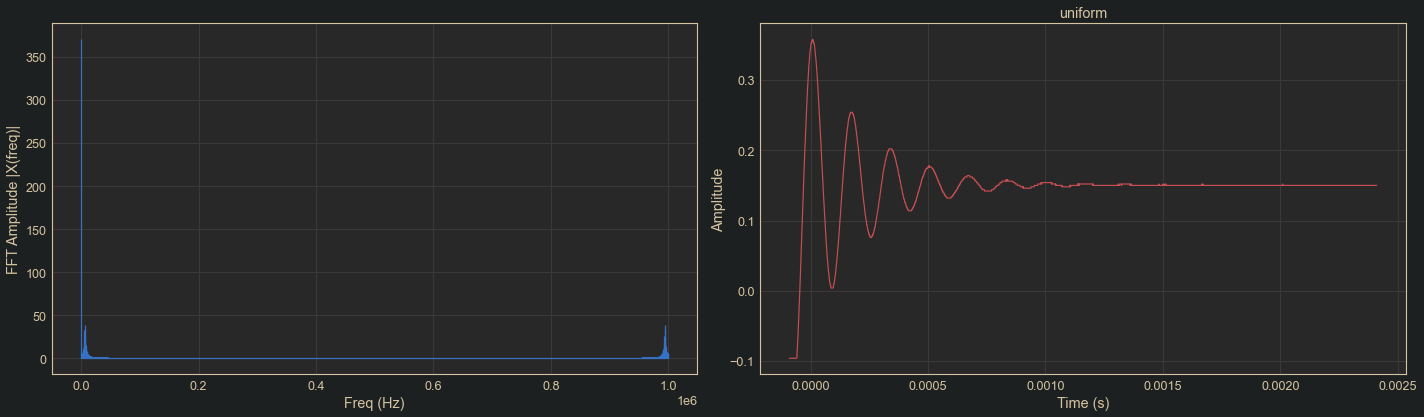

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


F0002CH1_CSV


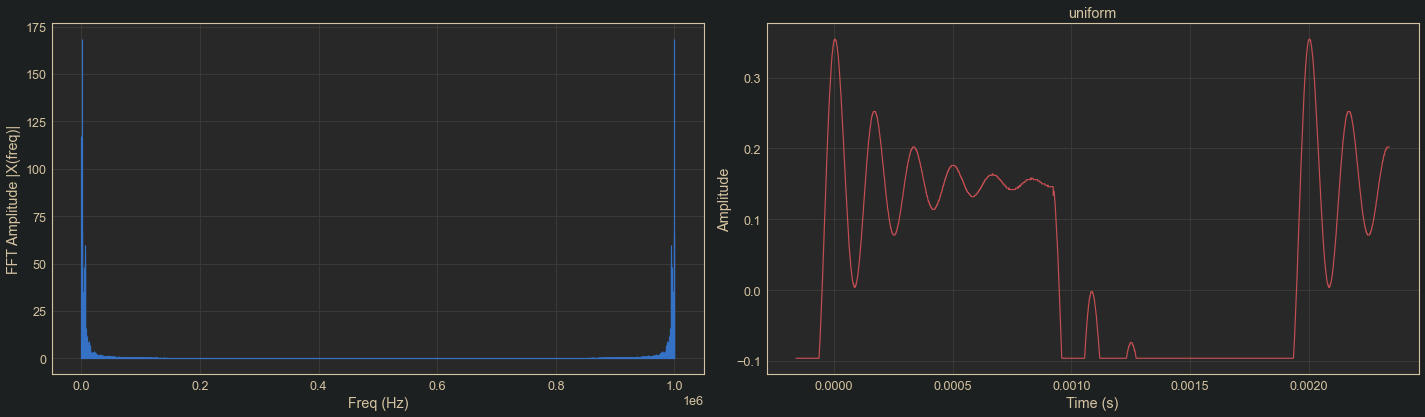

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


F0003CH1_CSV


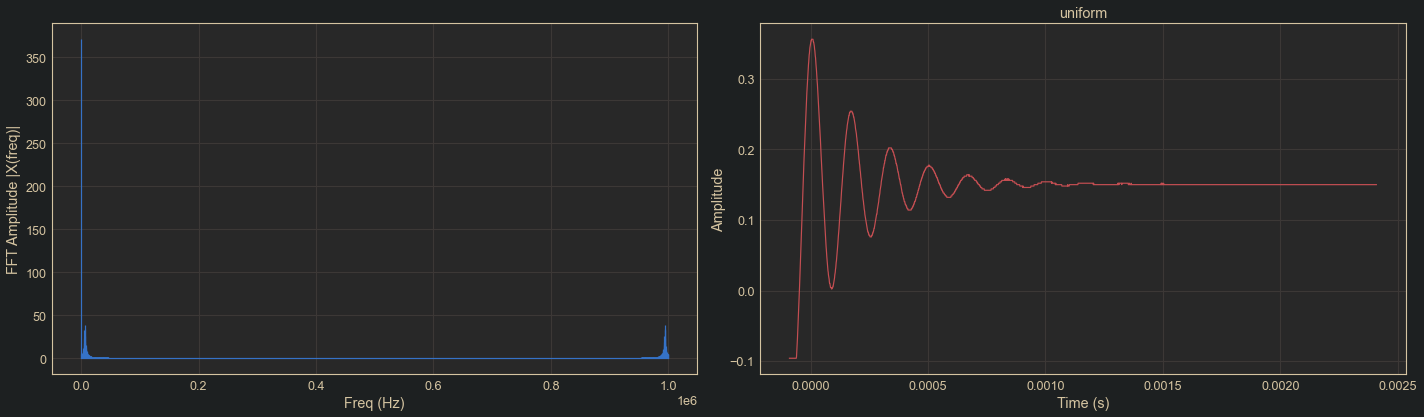

In [30]:
move_dir("part_2\part_d")
my_fft("F0000CH1.CSV")
my_fft("F0001CH1.CSV")
my_fft("F0002CH1.CSV")
my_fft("F0003CH1.CSV")

C:\Users\WillsPc\OneDrive\Documents\GitHub\AdvancedLab-PHSX444\lab02\data\part_2\part_d
C:\Users\WillsPc\OneDrive\Documents\GitHub\AdvancedLab-PHSX444\lab02\data\part_2\part_b
current directory: 
   ['2B.csv', '2BREE', '2B_avg', 'ALL0000']


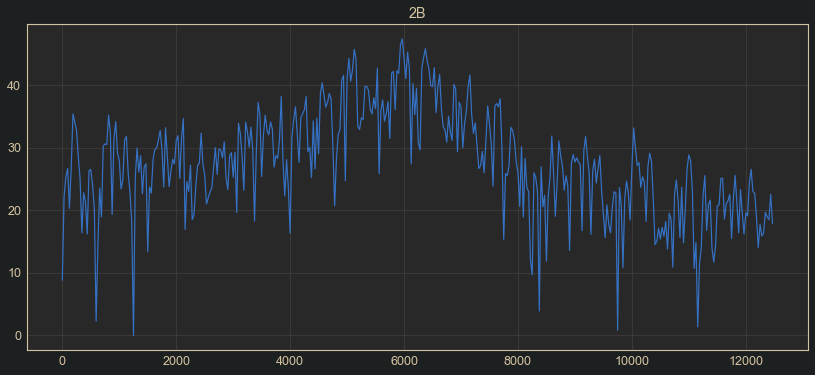

In [31]:
move_dir("part_2/part_b")
plotter("2B.csv", "2B")

In [32]:
ls

 Volume in drive C is OS
 Volume Serial Number is 4E89-5B0C

 Directory of C:\Users\WillsPc\OneDrive\Documents\GitHub\AdvancedLab-PHSX444\lab02\data\part_2\part_b

10/08/2021  10:59 AM    <DIR>          .
10/08/2021  10:59 AM    <DIR>          ..
04/08/1994  03:12 AM            14,400 2B.csv
04/08/1994  03:15 AM                 0 2B_avg
04/15/1994  03:48 AM            14,400 2BREE
10/08/2021  10:59 AM    <DIR>          ALL0000
               3 File(s)         28,800 bytes
               3 Dir(s)  393,926,447,104 bytes free


C:\Users\WillsPc\OneDrive\Documents\GitHub\AdvancedLab-PHSX444\lab02\data\part_2\part_b
C:\Users\WillsPc\OneDrive\Documents\GitHub\AdvancedLab-PHSX444\lab02\data\part_3\part_d
current directory: 
   ['3cm.BMP', '3cm.SET', '3cm_input.CSV', '3cm_resonance.CSV', '4cm.BMP', '4cm.SET', '4cm_input.CSV', '4cm_resonance.CSV', '5cm.BMP', '5cm.SET', '5cm_input.CSV', '5cm_resonance.CSV', '6cm.BMP', '6cm.SET', '6cm_input.CSV', '6cm_resonance.CSV']
uniform


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


3cm_resonance_csv


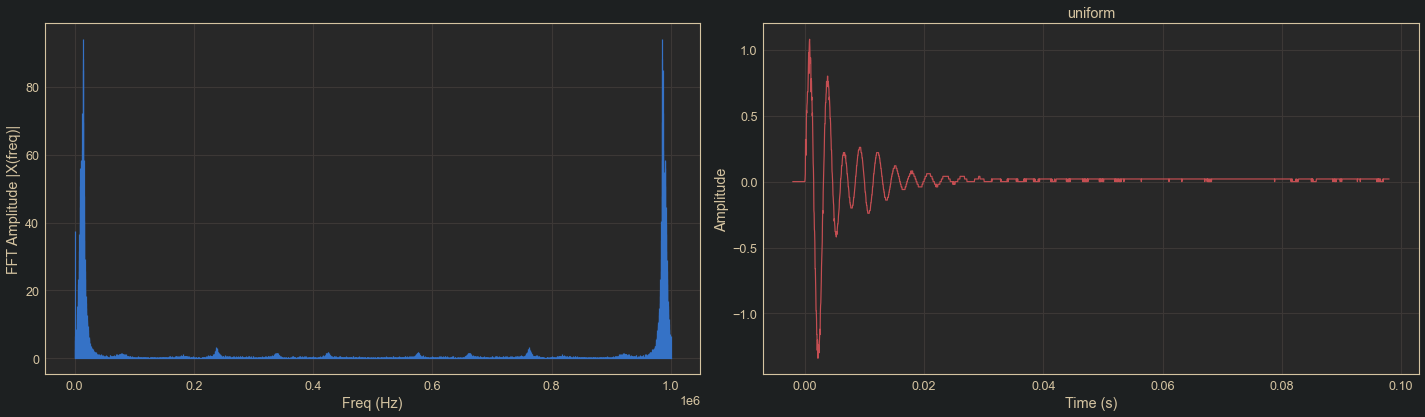

hanning


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


3cm_resonance_csv


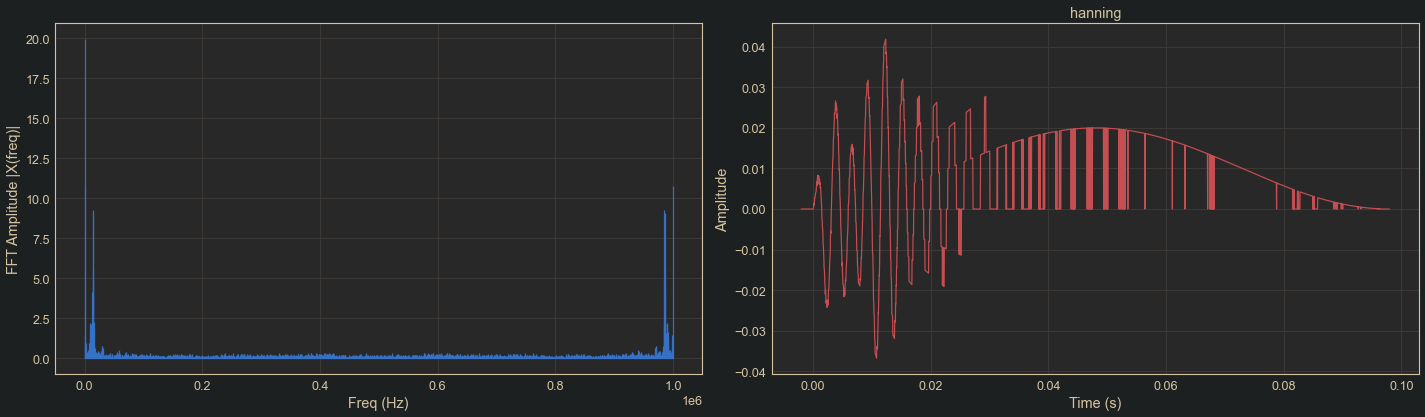

hamming
3cm_resonance_csv


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


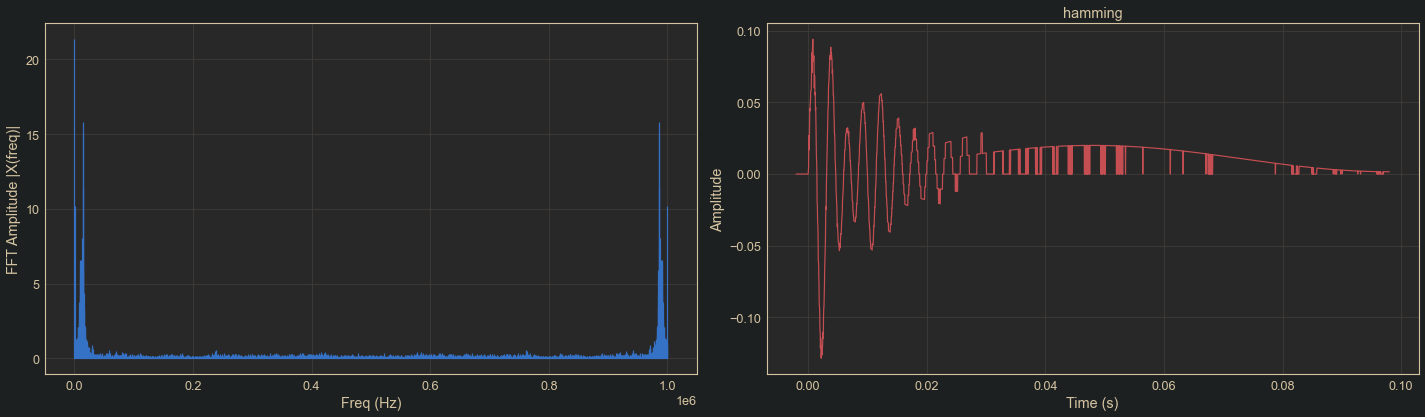

kaiser


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


3cm_resonance_csv


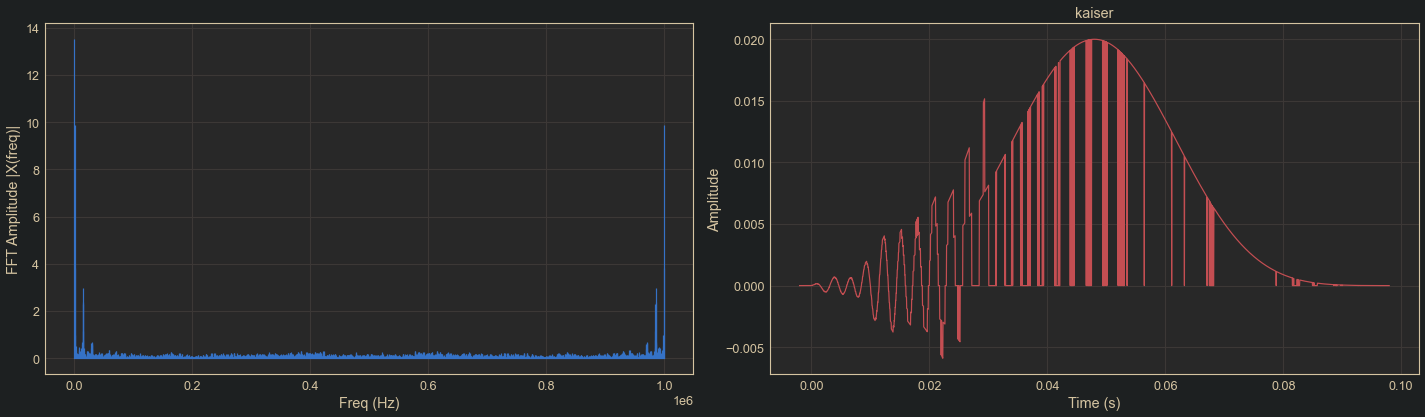

barlett


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


3cm_resonance_csv


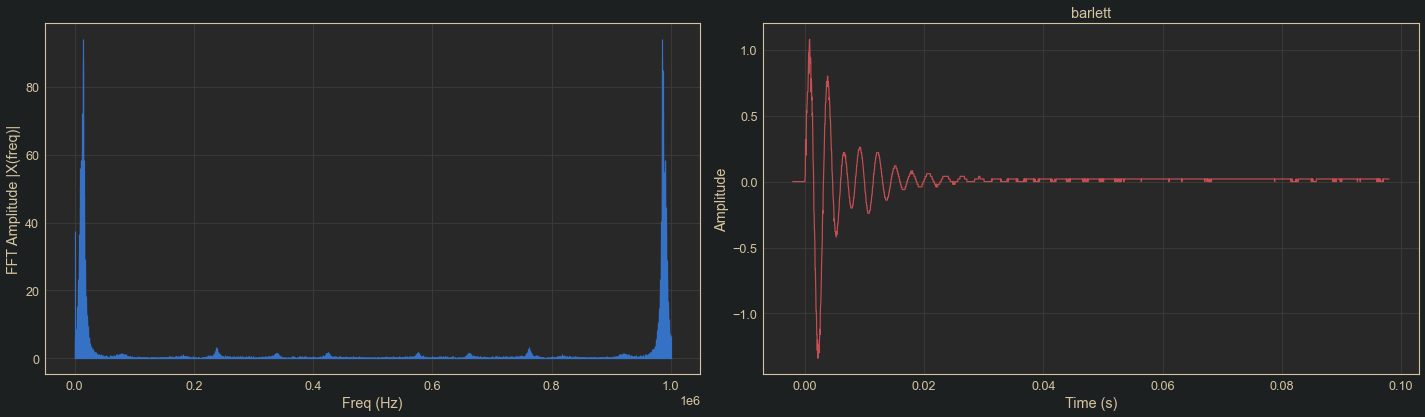

blackman


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


3cm_resonance_csv


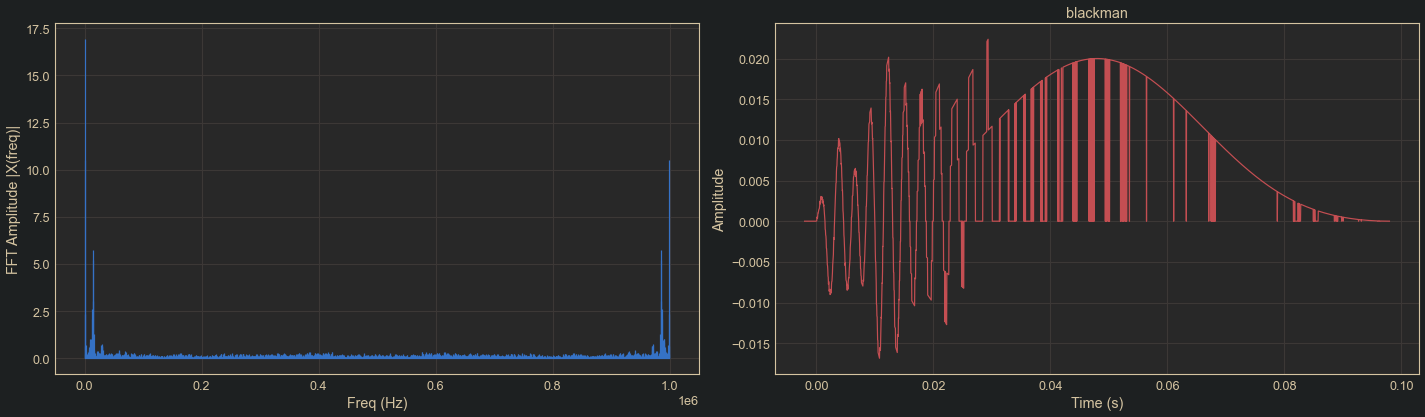

In [33]:
move_dir("part_3/part_d")
print("uniform")
my_fft("3cm_resonance.csv")
print("hanning")
my_fft("3cm_resonance.csv", "hanning")
print("hamming")
my_fft("3cm_resonance.csv", "hamming")
print("kaiser")
my_fft("3cm_resonance.csv", "kaiser")
print("barlett")
my_fft("3cm_resonance.csv", "barlett")
print("blackman")
my_fft("3cm_resonance.csv", "blackman")

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


4cm_resonance_csv


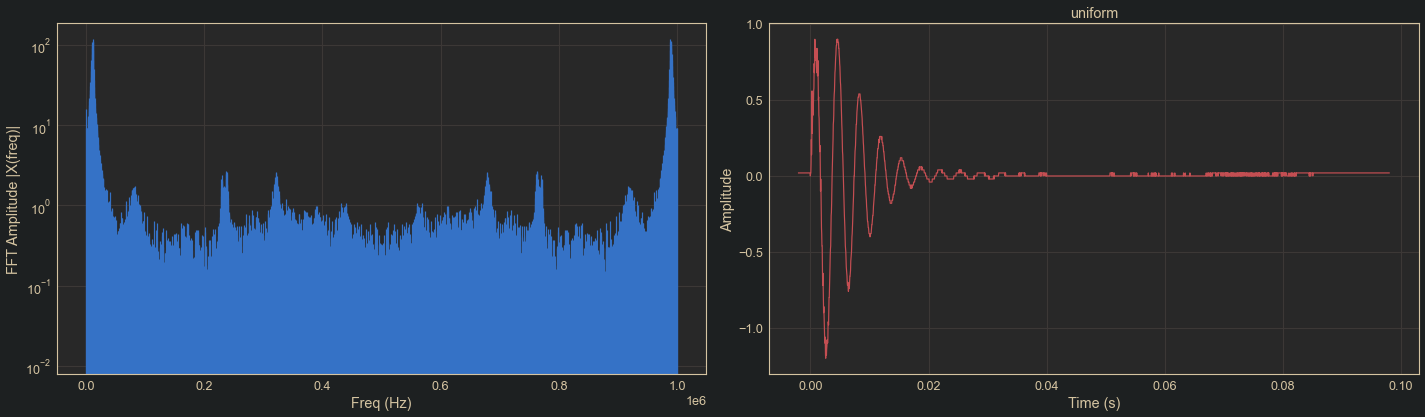

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


5cm_resonance_csv


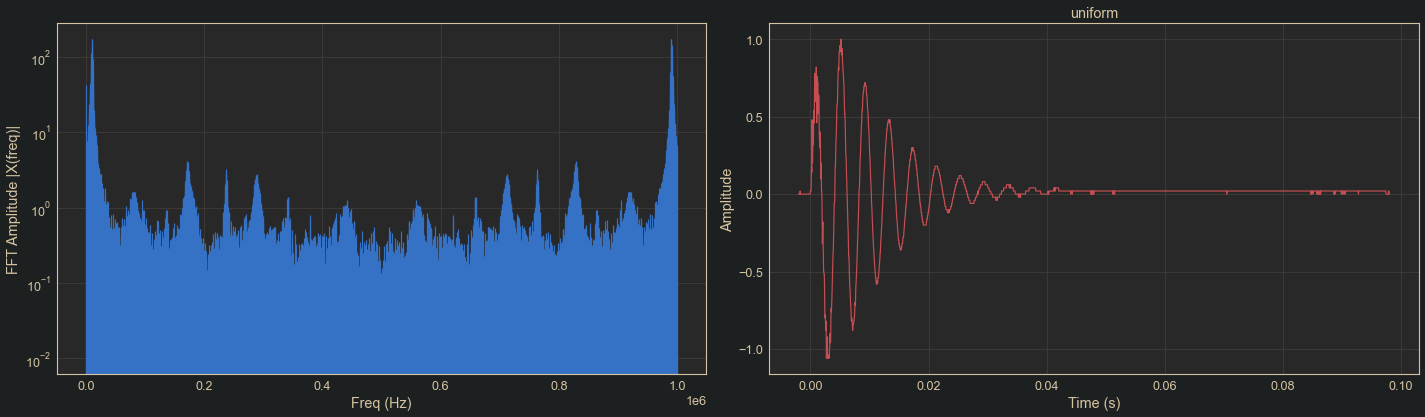

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


6cm_resonance_csv


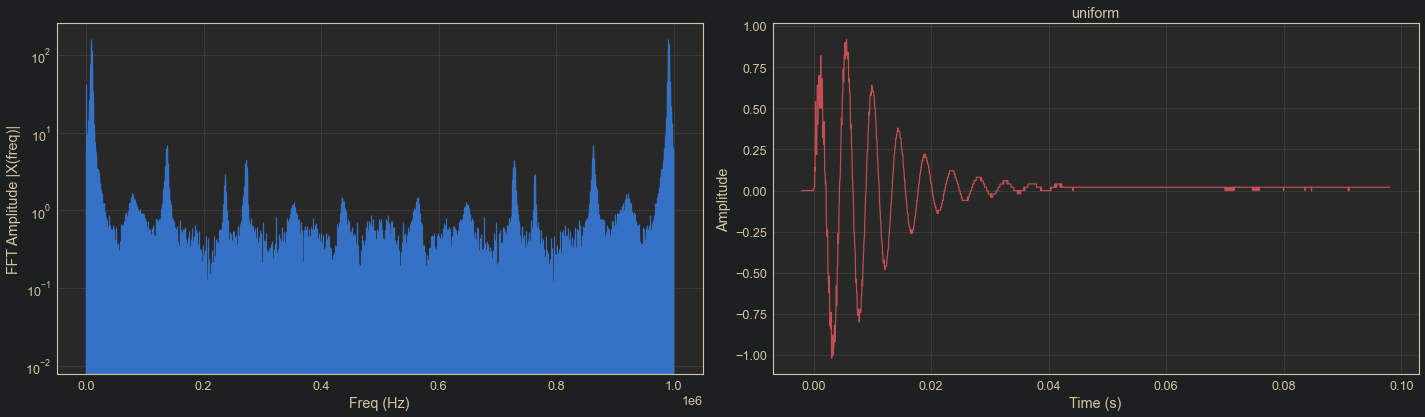

In [34]:
my_fft("4cm_resonance.csv", scale="log")
my_fft("5cm_resonance.csv", scale="log")
my_fft("6cm_resonance.csv", scale="log")